<a href="https://colab.research.google.com/github/srikanth2102/BREAST_CANCER/blob/main/breast_cance_random_forestr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER PREDICTION**

In [79]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [80]:
#uploading the file in the device to google colab
from google.colab import files
uploaded = files.upload()

In [81]:
#Reading File using Pandas
cancer =pd.read_csv("Breast_cancer_data.csv")
print(cancer.shape)
cancer.head()

(569, 6)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [82]:
#spliting cancer data into features and labels
target=cancer['diagnosis']
cancer.drop(['diagnosis'], axis=1, inplace=True)
target.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [83]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(cancer)

In [84]:
#spliting test data into test and validation
from sklearn.model_selection import train_test_split

train_x, dummy_x, train_y, dummy_y  = train_test_split(cancer , target, test_size=0.3,random_state=42)

test_x, val_x, test_y, val_y = train_test_split(dummy_x, dummy_y, test_size=0.5, random_state=42)

print(train_y.head())

149    1
124    1
421    1
195    1
545    1
Name: diagnosis, dtype: int64


In [85]:
#creating a dictionary to store F1 score
models=dict()

**LOGISTIC REGRESSION**

In [119]:
#importing logistic regression and metrices
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#model fitting
log_reg=LogisticRegression(C=1000)
log_reg.fit(train_x, train_y)

#predicting validation set
pred_log_reg = log_reg.predict(val_x)
temp = log_reg.predict(train_x) 

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_log_reg),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_log_reg),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_log_reg),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_log_reg),"\n")

accuray on validation set 0.9767441860465116 

precision on validation set 1.0 

recall on validation set 0.9666666666666667 

F1 score of validation set 0.983050847457627 



In [120]:
models['log_reg']=f1_score(val_y,pred_log_reg)

**SUPPORT VECTOR MACHINE**

In [121]:
#Imprting SVC(support vector machine for classification)
from sklearn.svm import SVC

#model fitting
svm=SVC(kernel='rbf', C=1, gamma=.01)
print(svm)
svm.fit(train_x,train_y)

#prediction on validation set
pred_svm=svm.predict(val_x)
temp=svm.predict(train_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_svm),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_svm),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_svm),"\n")
#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_svm),"\n")

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
accuray on validation set 0.9069767441860465 

precision on validation set 0.9333333333333333 

recall on validation set 0.9333333333333333 

F1 score of validation set 0.9333333333333333 



In [122]:
models['svm']=f1_score(val_y,pred_svm)

**DECISION TREE**

In [123]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#model fitting
tree=DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10)
print(tree)
tree.fit(train_x,train_y)

#prediction on validation set
pred_tree=tree.predict(val_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_tree),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_tree),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_tree),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_tree),"\n")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
accuray on validation set 0.9534883720930233 

precision on validation set 0.9516129032258065 

recall on validation set 0.9833333333333333 

F1 score of validation set 0.9672131147540983 



In [124]:
models['tree']=f1_score(val_y,pred_tree)

**RANDOM FOREST**

In [125]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#model fitting
forest=RandomForestClassifier(max_features='auto', n_estimators=1000)
print(forest)
forest.fit(train_x,train_y)

#prediction on validation set
pred_forest=forest.predict(val_x)
temp=forest.predict(train_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_forest),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_svm),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_svm),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_forest),"\n")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
accuray on validation set 0.9883720930232558 

precision on validation set 0.9333333333333333 

recall on validation set 0.9333333333333333 

F1 score of validation set 0.9915966386554621 



In [126]:
models['forest']=f1_score(val_y,pred_forest)

**BOOSTING (DECISION TREE)**

In [133]:
#importing boosting using decison tree classifier
from sklearn.ensemble import GradientBoostingClassifier

#model fitting
boosting=GradientBoostingClassifier(max_features='auto',max_depth=3,n_estimators=2000,learning_rate=1)
boosting.fit(train_x,train_y)

#prediction on validation set
pred_boosting=boosting.predict(val_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_boosting),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_boosting),"\n")


#recall on validation set
print("recall on validation set",recall_score(val_y,pred_boosting),"\n")

#F1 score on validation set 
print("F1 score of validation set",f1_score(val_y,pred_boosting),"\n")

accuray on validation set 0.9534883720930233 

precision on validation set 0.9827586206896551 

recall on validation set 0.95 

F1 score of validation set 0.9661016949152542 



In [134]:
models['boosting']= f1_score(val_y,pred_boosting)

**MLP CLASSIFIER(NEURAL NETWORK)**

In [135]:
#importing MLP classifier
from sklearn.neural_network import MLPClassifier

#model fitting
mlp=MLPClassifier(max_iter=400, activation='tanh', hidden_layer_sizes=(100,100), solver='lbfgs', alpha=1e-08)
print(mlp)
mlp.fit(train_x,train_y)

#prediction on validation set
pred_mlp= mlp.predict(val_x)
temp= mlp.predict(train_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_mlp),"\n")
print("accuray on train set",accuracy_score(train_y,temp),"\n")

#precision on validation set
#print("precision on validation set",precision_score(val_y,pred_mlp),"\n")

#recall on validation set
#print("recall on validation set",recall_score(val_y,pred_mlp),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_mlp),"\n")
print("F1 score of train set",f1_score(train_y,temp),"\n")

MLPClassifier(activation='tanh', alpha=1e-08, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
accuray on validation set 0.9651162790697675 

accuray on train set 0.914572864321608 

F1 score of validation set 0.9743589743589743 

F1 score of train set 0.9317269076305221 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [136]:
models['mlp'] = f1_score(val_y,pred_mlp)
models

{'boosting': 0.9661016949152542,
 'forest': 0.9915966386554621,
 'log_reg': 0.983050847457627,
 'mlp': 0.9743589743589743,
 'svm': 0.9333333333333333,
 'tree': 0.9672131147540983}

**PLOTTING F1 SCORE OF MODELS**

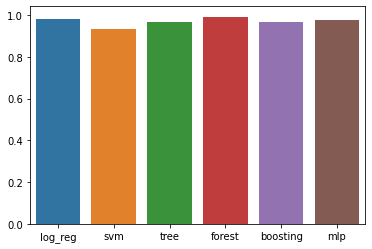

In [137]:
import seaborn as sns
sns.barplot(x=list(models.keys()), y=list(models.values()))

## **SELECTING MODEL:**
Clearly the best model to predict the test set on is random forest. Random forest has an F1_score of 99.159. 

## **FINAL MODEL: RANDOM FOREST**

In [140]:
#predicting the test set
Y_pred = forest.predict(test_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(test_y,Y_pred),"\n")

#precision on validation set
print("precision on validation set",precision_score(test_y,Y_pred),"\n")

#recall on validation set
print("recall on validation set",recall_score(test_y,Y_pred),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(test_y,Y_pred),"\n")

accuray on validation set 0.9529411764705882 

precision on validation set 0.9782608695652174 

recall on validation set 0.9375 

F1 score of validation set 0.9574468085106383 



## **CLASSIFICATION REPORT**

In [141]:
from sklearn.metrics import classification_report
target_names = ['non_cancerous', 'cancerous']
print(classification_report(test_y, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

non-cancerous       0.92      0.97      0.95        37
    cancerous       0.98      0.94      0.96        48

     accuracy                           0.95        85
    macro avg       0.95      0.96      0.95        85
 weighted avg       0.95      0.95      0.95        85

